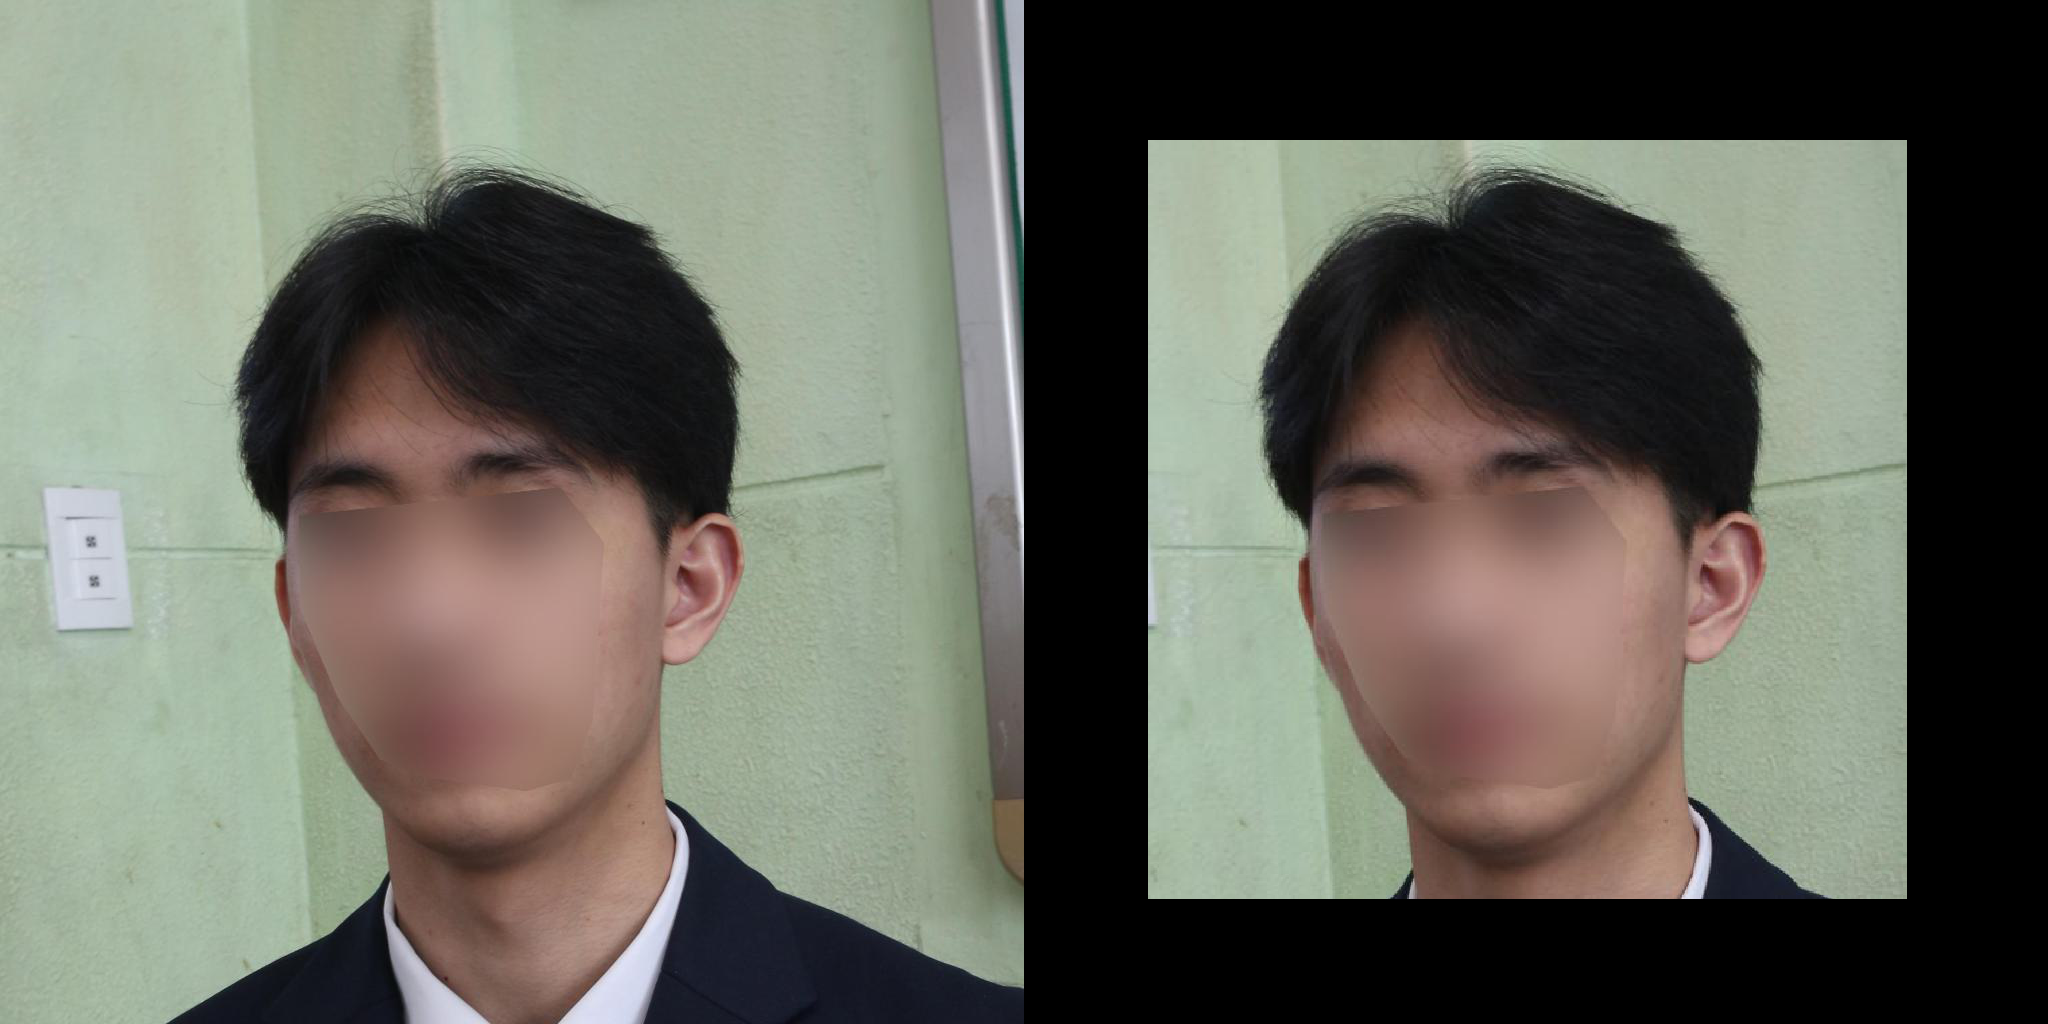

(1024, 1024, 3) (1024, 1024, 3)


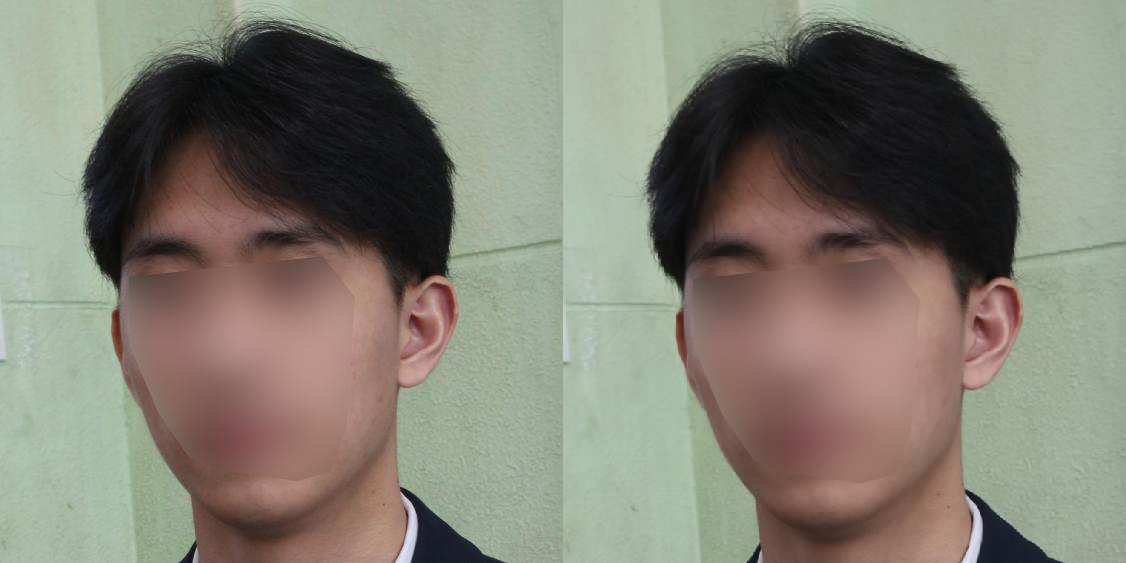

(563, 563, 3) (563, 563, 3)


In [24]:
import json
import cv2
import numpy as np
from PIL import Image


def calculate_pad(box):
    # expected input: [x_min, y_min, w, h]
    # print('box', box)
    x_min, y_min, w, h = np.int32(box)
    x_max, y_max = x_min + w, y_min + h
    # print(x_min, y_min, x_max, y_max)
    top_size, bottom_size, left_size, right_size = 0, 0, 0, 0
    if x_min < 0:
        left_size = abs(x_min)
        x_min = 0
    if y_min < 0:
        top_size = abs(y_min)
        y_min = 0
    if x_max > 1024:
        right_size = abs(x_max - 1024)
        x_max = 1024
    if y_max > 1024:
        bottom_size = abs(y_max - 1024)
        y_max = 1024
    return x_min, y_min, x_max, y_max, top_size, bottom_size, left_size, right_size, h, w

def convert_1024_to_563(image_data, box, bg_value=0):
    x_min, y_min, x_max, y_max, top_size, bottom_size, left_size, right_size, h, w = calculate_pad(box)
    # print(top_size, bottom_size, left_size, right_size)
    crop_img = image_data[y_min:y_max, x_min:x_max]
    if top_size + bottom_size + left_size + right_size != 0:
        crop_img = cv2.copyMakeBorder(crop_img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT, value=bg_value)
    # print(crop_img.shape, (h, w))
    assert crop_img.shape[0] == h
    assert crop_img.shape[1] == w
    crop_resize_img = cv2.resize(crop_img, (563, 563), interpolation=cv2.INTER_NEAREST)
    return crop_resize_img

def convert_563_to_1024(image_data, box, bg_value=0):
    x_min, y_min, x_max, y_max, top_size, bottom_size, left_size, right_size, h, w = calculate_pad(box)
    resize_img = cv2.resize(image_data, (w, h), interpolation=cv2.INTER_NEAREST)
    resize_img = resize_img[top_size:h-bottom_size, left_size:w-right_size]
    resize_img = cv2.copyMakeBorder(resize_img, y_min, 1024-y_max, x_min, 1024-x_max, borderType=cv2.BORDER_CONSTANT, value=bg_value)
    return resize_img


img1024_file = "/home/chence/Workspaces/P3D/Codes/DatProc/data/K-Hairstyle/Training/rawset_crop/0003.rawset/0001.가르마/0126.CP032677/image1024/CP032677-001.jpg"
img563_file = "/home/chence/Workspaces/P3D/Codes/DatProc/data/K-Hairstyle/Training/rawset_crop/0003.rawset/0001.가르마/0126.CP032677/image563/CP032677-001.jpg"
info_file = "/home/chence/Workspaces/P3D/Codes/DatProc/data/K-Hairstyle/Training/rawset_crop/0003.rawset/0001.가르마/0126.CP032677/info_dict/CP032677-001.json"

with open(info_file, 'r') as f:
    info = json.load(f)

img1024_np = np.array(Image.open(img1024_file))
img563_np = np.array(Image.open(img563_file))
#! Convert 1024x1024 to 563x563
img563_from_1024 = convert_1024_to_563(img1024_np, info['head']['align_box'])
#! Convert 563x563 to 1024x1024
img1024_from_563 = convert_563_to_1024(img563_np, info['head']['align_box'])


display(Image.fromarray(np.hstack([img1024_np, img1024_from_563])))
print(img1024_np.shape, img1024_from_563.shape)

display(Image.fromarray(np.hstack([img563_np, img563_from_1024])))
print(img563_np.shape, img563_from_1024.shape)